# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [81]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [83]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 114MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 98.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 40.7MB/s]


In [84]:
data = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')

In [85]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [87]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [88]:
data['HasInternetService'].value_counts()

,count
HasInternetService,
Fiber optic,2341
DSL,1800
No,1141


In [89]:
data['HasMultiplePhoneNumbers'].value_counts()

,count
HasMultiplePhoneNumbers,
No,2511
Yes,2250
No phone service,521


In [90]:
data['HasContractPhone'].value_counts()

,count
HasContractPhone,
Month-to-month,2920
Two year,1280
One year,1082


In [91]:
data['Churn'].value_counts()

,count
Churn,
0,3898
1,1384


In [92]:
data['TotalSpent'].value_counts()

,count
TotalSpent,
,9
20.2,9
19.75,8
20.05,6
19.65,6
...,...
41.85,1
4326.25,1
950.2,1


In [93]:
#Заметим, что есть пустые значения
empty_strings = data.apply(lambda x: x == ' ').any()
empty_strings

,0
ClientPeriod,False
MonthlySpending,False
TotalSpent,True
Sex,False
IsSeniorCitizen,False
HasPartner,False
HasChild,False
HasPhoneService,False
HasMultiplePhoneNumbers,False
HasInternetService,False


In [94]:
empty_strings = data_test.apply(lambda x: x == ' ').any()
empty_strings

,0
ClientPeriod,False
MonthlySpending,False
TotalSpent,True
Sex,False
IsSeniorCitizen,False
HasPartner,False
HasChild,False
HasPhoneService,False
HasMultiplePhoneNumbers,False
HasInternetService,False


In [95]:
#заменим их на наны
data['TotalSpent'] = data['TotalSpent'].replace(' ', pd.NA)
data_test['TotalSpent'] = data_test['TotalSpent'].replace(' ', pd.NA)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [96]:
data[['ClientPeriod', 'TotalSpent', 'MonthlySpending']]
#почти линейная зависимость TotalSpent = ClientPeriod * MonthlySpending

,ClientPeriod,TotalSpent,MonthlySpending
0,55,1026.35,19.50
1,72,1872.2,25.85
2,1,75.9,75.90
3,32,2570,79.30
4,60,6758.45,115.25
...,...,...,...
5277,3,82.15,30.40
5278,50,2188.45,44.45
5279,1,55.05,55.05
5280,29,2215.25,76.00


In [97]:
#выходит, что TotalSpent у нанов это 0
nans = data[data[['TotalSpent', 'MonthlySpending']].isna().any(axis=1)][['ClientPeriod', 'TotalSpent', 'MonthlySpending']]
nans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1048 to 4598
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     9 non-null      int64  
 1   TotalSpent       0 non-null      object 
 2   MonthlySpending  9 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 288.0+ bytes


In [98]:
data['TotalSpent'] = data['TotalSpent'].fillna(0)
data_test['TotalSpent'] = data_test['TotalSpent'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

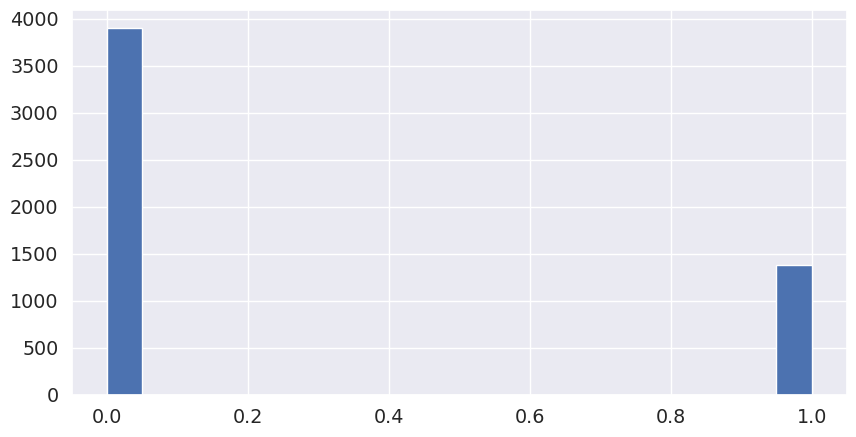

2.816473988439306

In [99]:
#проанализируем распределение целевой переменной

plt.figure(figsize = (10, 5))
data['Churn'].hist(density=False, bins=20)
plt.show()
3898/1384 # датасет не сильно несбалансирован (2.816)

## Анализ численных признаков

In [100]:
#TotalSpent не является числовым, изменим это
data['TotalSpent'] = data['TotalSpent'].astype('float64')
data_test['TotalSpent'] = data_test['TotalSpent'].astype('float64')
num_features = data[num_cols]
num_features

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45
...,...,...,...
5277,3,30.40,82.15
5278,50,44.45,2188.45
5279,1,55.05,55.05
5280,29,76.00,2215.25


In [101]:
data['ClientPeriod'].value_counts()

,count
ClientPeriod,
1,457
72,284
2,165
3,162
4,136
...,...
57,39
39,35
44,34


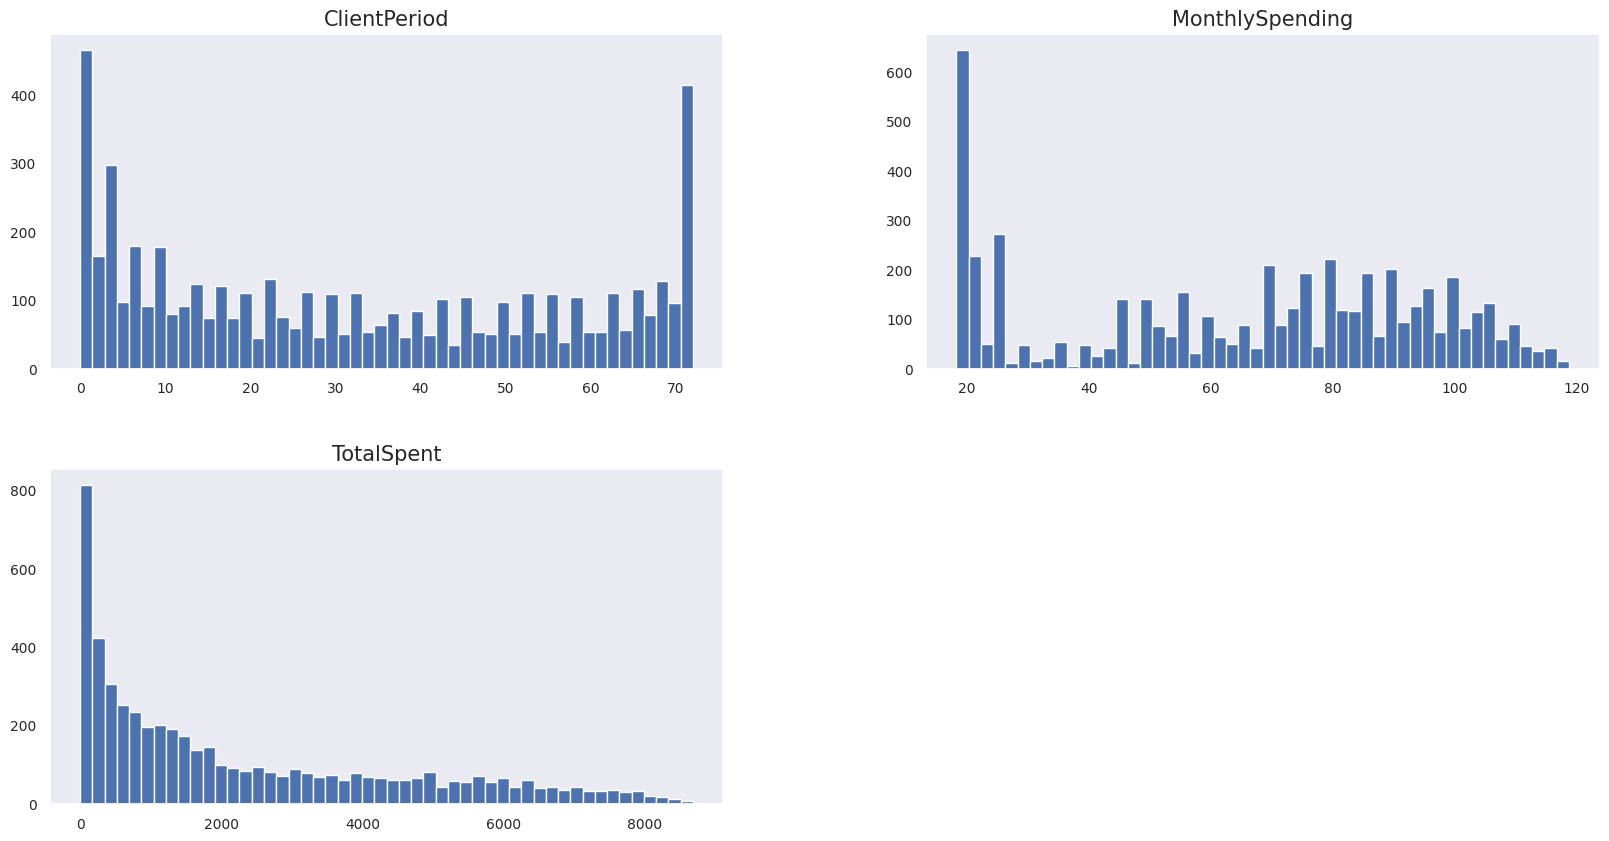

In [102]:
num_features.hist(figsize=(20, 10), bins=50, xlabelsize=10, ylabelsize=10, grid=False);

### Анализ категориальных признаков

In [103]:
categorical_features = data[cat_cols]
categorical_features

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


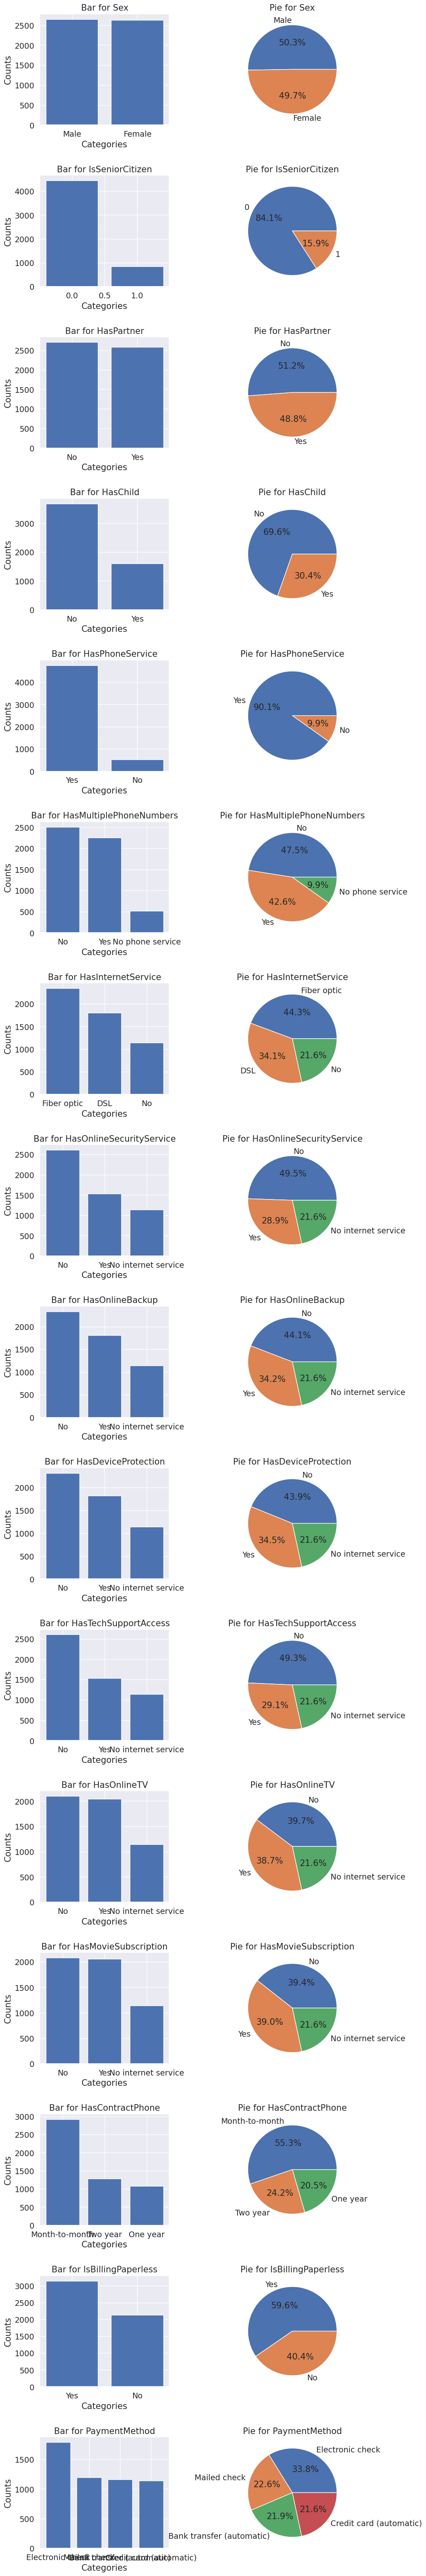

In [104]:
#Рассмотрим количество значений в каждом признаке
num_features = len(categorical_features.columns)
fig, axes = plt.subplots(nrows = num_features, ncols = 2, figsize = (10, 4 * num_features))
fig.tight_layout(pad = 4)
for i, col in enumerate(categorical_features.columns):
    value_counts = categorical_features[col].value_counts()

    axes[i, 0].bar(value_counts.index, value_counts.values)
    axes[i, 0].set_title(f'Bar for {col}')
    axes[i, 0].set_xlabel('Categories')
    axes[i, 0].set_ylabel('Counts')

    axes[i, 1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    axes[i, 1].set_title(f'Pie for {col}')

plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [105]:
# в TotalSpent обработаны пустые значения

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [106]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [107]:
# One-hot кодирование(отдельно оставим обработанный data для бустинга)
dummy_features = pd.get_dummies(categorical_features).astype(int)
df_train = pd.concat([data, dummy_features], axis=1)
df_test = pd.concat([data_test, dummy_features], axis=1)
df_train = df_train.drop(cat_cols, axis=1)
df_test = df_test.drop(cat_cols, axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5282 non-null   int64  
 1   MonthlySpending                               5282 non-null   float64
 2   TotalSpent                                    5282 non-null   float64
 3   Churn                                         5282 non-null   int64  
 4   Sex_Female                                    5282 non-null   int64  
 5   Sex_Male                                      5282 non-null   int64  
 6   HasPartner_No                                 5282 non-null   int64  
 7   HasPartner_Yes                                5282 non-null   int64  
 8   HasChild_No                                   5282 non-null   int64  
 9   HasChild_Yes                                  5282 non-null   i

In [108]:
df_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


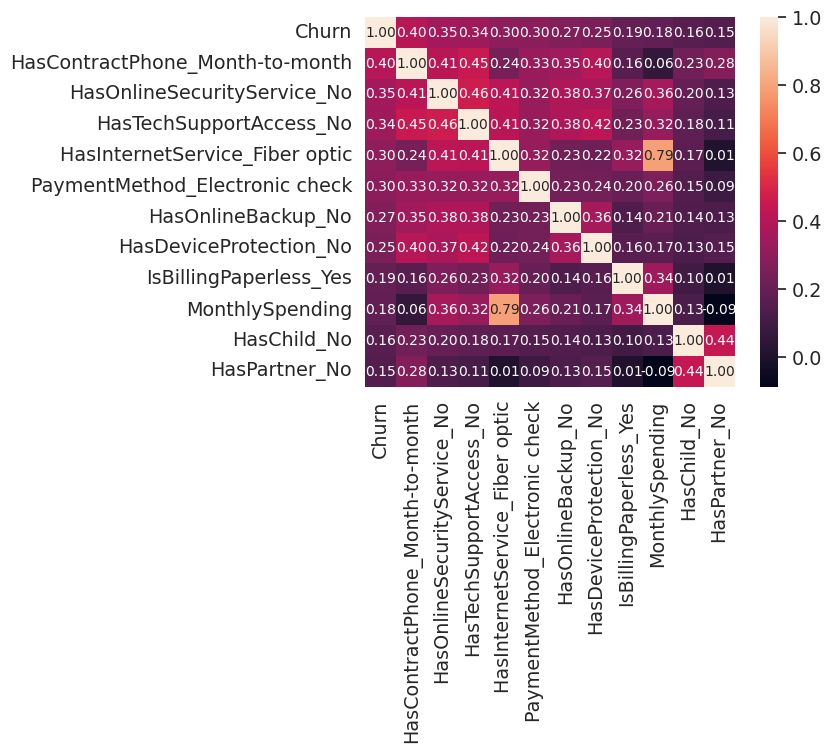

In [109]:
#Посмотрим на корреляцию данных с целевой переменной
#заметим сильную зависимость между MonthlySpending и HasInternetService_Fiber optic
#удалим ту, которая меньше влияет на целевую переменную
corrmat = df_train.corr()
k = 12
cols = corrmat.nlargest(k, 'Churn')['Churn'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [110]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5282 non-null   int64  
 1   MonthlySpending                               5282 non-null   float64
 2   TotalSpent                                    5282 non-null   float64
 3   Churn                                         5282 non-null   int64  
 4   Sex_Female                                    5282 non-null   int64  
 5   Sex_Male                                      5282 non-null   int64  
 6   HasPartner_No                                 5282 non-null   int64  
 7   HasPartner_Yes                                5282 non-null   int64  
 8   HasChild_No                                   5282 non-null   int64  
 9   HasChild_Yes                                  5282 non-null   i

In [111]:
#Подготовим данные для обучения модели
X = df_train.drop(columns=['Churn', 'MonthlySpending'])
X_test = df_test.drop(columns=['MonthlySpending'])
y = df_train['Churn']

In [112]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=41)

In [113]:
#Обработаем численные признаки
scaler = StandardScaler()
X_train[['ClientPeriod', 'TotalSpent']] = scaler.fit_transform(X_train[['ClientPeriod', 'TotalSpent']])
X_valid[['ClientPeriod', 'TotalSpent']] = scaler.transform(X_valid[['ClientPeriod', 'TotalSpent']])
X_test[['ClientPeriod', 'TotalSpent']] = scaler.transform(X_test[['ClientPeriod', 'TotalSpent']])
X_train

,ClientPeriod,TotalSpent,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1506,0.801708,0.121538,0,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
3520,0.231709,0.096458,0,1,1,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2573,0.679565,0.980673,0,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
3517,0.557423,-0.328317,0,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
192,-0.216146,-0.056607,0,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,-0.786145,-0.834661,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4066,0.068853,-0.613220,1,0,0,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
3980,-0.338289,0.067240,1,0,0,1,1,0,0,1,...,1,1,0,0,0,1,0,1,0,0
931,1.290278,-0.323536,0,1,0,1,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0


In [114]:
#Подберём гиперпараметр C и обучим модель
model = LogisticRegressionCV(
    Cs=[100, 10, 1, 0.1, 0.01, 0.001],
    cv=5,
    scoring='roc_auc',
    refit=True,
    random_state=42,
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train, y_train)

best_C = model.C_[0]
print("Лучший параметр C:", best_C)

roc_auc_train = model.score(X_train, y_train)
roc_auc_valid = model.score(X_valid, y_valid)
print("ROC-AUC на валидационной выборке:", roc_auc_valid)
print("ROC-AUC на тренировочной выборке:", roc_auc_train)

Лучший параметр C: 100.0
ROC-AUC на валидационной выборке: 0.867033410024974
ROC-AUC на тренировочной выборке: 0.8433495822324033


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [115]:
import xgboost
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [116]:
#Подготовим тренировочные данные для catboost(без обработки числ. и кат. признаков)
X_ = data.drop(columns=['Churn', 'MonthlySpending'])
y_ = data['Churn']
num_cols = [
    'ClientPeriod',
    'TotalSpent'
]

In [117]:
!pip install catboost

In [118]:
#CatBoost произвольные гиперпараметры модели
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, train_size=0.8, random_state=41)

model = CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred)
print("ROC-AUC с параметрами по умолчанию:", roc_auc)


ROC-AUC с параметрами по умолчанию: 0.8610185239808861


In [119]:
#Найдём лучшие параметры модели с помощью grid_search
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, train_size=0.8, random_state=41)

model = CatBoostClassifier(cat_features=cat_cols)

grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.1, 0.01, 0.001],
    'l2_leaf_reg': [1, 2, 3, 4]
}
grid_search_result = model.grid_search(
    grid,
    X_train,
    y_train,
    plot=True,
    refit=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
176:	learn: 0.2967345	test: 0.4410499	best: 0.4327052 (51)	total: 2.55s	remaining: 3.21s
177:	learn: 0.2965814	test: 0.4412224	best: 0.4327052 (51)	total: 2.56s	remaining: 3.2s
178:	learn: 0.2964921	test: 0.4413089	best: 0.4327052 (51)	total: 2.58s	remaining: 3.18s
179:	learn: 0.2963969	test: 0.4413844	best: 0.4327052 (51)	total: 2.59s	remaining: 3.17s
180:	learn: 0.2962725	test: 0.4414302	best: 0.4327052 (51)	total: 2.6s	remaining: 3.15s
181:	learn: 0.2957771	test: 0.4414054	best: 0.4327052 (51)	total: 2.63s	remaining: 3.15s
182:	learn: 0.2955040	test: 0.4416894	best: 0.4327052 (51)	total: 2.64s	remaining: 3.13s
183:	learn: 0.2948155	test: 0.4416199	best: 0.4327052 (51)	total: 2.67s	remaining: 3.13s
184:	learn: 0.2937902	test: 0.4418453	best: 0.4327052 (51)	total: 2.68s	remaining: 3.12s
185:	learn: 0.2935638	test: 0.4418387	best: 0.4327052 (51)	total: 2.69s	remaining: 3.1s
186:	learn: 0.2930695	test: 0.4419506	best: 0

In [120]:
#Нашли лучшие параметры
best_params = grid_search_result['params']
print("Лучшие параметры:", grid_search_result['params'])

Лучшие параметры: {'learning_rate': 0.1, 'l2_leaf_reg': 4, 'iterations': 100}


In [121]:
#Обучили модель на тренир. данных и получили y_valid_pred
best_model = CatBoostClassifier(silent=True, cat_features=cat_cols,
                                             eval_metric='AUC', **best_params)
best_model.fit(X_train, y_train)
y_valid_pred = best_model.predict_proba(X_valid)[:, 1]

In [122]:
roc_auc = roc_auc_score(y_valid, y_valid_pred)
print("ROC-AUC на тестовой выборке:", roc_auc)

ROC-AUC на тестовой выборке: 0.8667556486342989


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [123]:
#Лучшая модель в среднем - CatBoostClassifier
best_model = CatBoostClassifier(silent=True, cat_features=cat_cols,
                                             eval_metric='AUC', **best_params)
X_test_ = data_test.drop(columns=['MonthlySpending']) #для catboost

In [124]:
submission = pd.read_csv('./submission.csv')
submission

,Id,Churn
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
1756,1756,0.5
1757,1757,0.5
1758,1758,0.5
1759,1759,0.5


In [125]:
best_model.fit(X_, y_)
submission['Churn'] = best_model.predict_proba(X_test_)[:, 1]
submission.to_csv('./my_submission.csv')
submission

,Id,Churn
0,0,0.043396
1,1,0.677038
2,2,0.686143
3,3,0.015875
4,4,0.010109
...,...,...
1756,1756,0.108596
1757,1757,0.016270
1758,1758,0.831008
1759,1759,0.580022


Лучшее решение отправьте в Stepik.